In [1]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality     # Access to example data provided with fastai


In [2]:
path="data"
df = pd.read_csv("data/shuffeled.csv",comment="-"); #df

In [3]:
dep_var = 'journey'
cat_names = ["detectedActivity","weekday"]
cont_names =["geoHash","minuteOfDay"]
procs = [FillMissing, Categorify, Normalize]

In [4]:
valid_idx = range(len(df)-3000, len(df)) ##Change
print(valid_idx)
   # n = len(list(open(PATH)))-1
  #  val_idxs = get_cv_idxs(n)

range(3759, 6759)


In [55]:
test = TabularList.from_df(df.iloc[30:32].copy(), path=path, cat_names=cat_names, cont_names=cont_names)

In [6]:
#test = TabularList.from_df(df.iloc[800:1000].copy(), path=path, cat_names=cat_names, cont_names=cont_names)
#data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)
#
tabularList = TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
splitList= tabularList.split_by_idx(list(valid_idx))
splitListLabel=splitList.label_from_df(cols=dep_var)
splitListLabeltest =splitListLabel.add_test(test, label="MySmallTest") #fastai/data_block.py
data = splitListLabeltest.databunch()
#add_test_folder(self, test_folder:str='test', label:Any=None):
# data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
#                            .split_by_idx(list(range(800,1000)))
#                            .label_from_df(cols=dep_var)
#                            .add_test(test, label=0)
#                            .databunch())
#print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}
#print(data.train_ds.cat_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

In [20]:
#print(data.test_ds.x)
#print(data.test_ds.y)
#len(data.test_ds)
data.

6

Total time: 00:05
epoch  train_loss  valid_loss  accuracy
1      0.611669    0.354226    0.969667  (00:00)
2      0.194864    0.032978    0.999000  (00:01)
3      0.069038    0.019705    0.999333  (00:01)
4      0.025821    0.005724    0.999667  (00:01)
5      0.011409    0.005138    0.999667  (00:01)



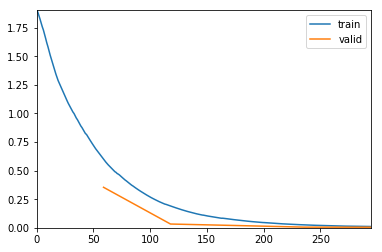

In [56]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy,callback_fns=ShowGraph)
#learn.fit(3, 1e-2)
learn.fit_one_cycle(5)

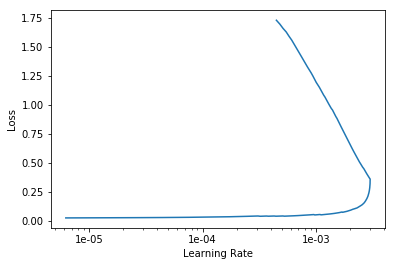

In [10]:
learn.recorder.plot()

In [17]:
#predictions = learn.get_preds(ds_type="Test")
#len(predictions[0][0])
preds = learn.pred_batch(ds_type="Test") #pbar testa
#learn.validate()

In [33]:
preds = learn.pred_batch(ds_type="Test")
print(preds)

tensor([[7.6952e-04, 1.4775e-03, 1.6534e-03, 1.2637e-03, 1.3081e-03, 9.9353e-01]])


In [57]:
pred = learn.get_preds(ds_type="Test")
pred[0][1]

tensor([1.3457e-03, 8.5995e-04, 6.4746e-04, 2.4626e-04, 9.9585e-01, 1.0472e-03])

In [59]:
result = pred[1]
print(len(result))
print(result)
print(result[0])
#Hur fan får jag klasserna till detta!!!!

3000
tensor([5, 4, 0,  ..., 1, 3, 0])
tensor(5)


In [28]:
ds=data.single_dl.dataset
res = learn.pred_batch(ds_type=DatasetType.Single, pbar=None)
ds.predict(res)

(9004281216,
 tensor(5),
 tensor([7.6952e-04, 1.4775e-03, 1.6534e-03, 1.2637e-03, 1.3081e-03, 9.9353e-01]))

In [43]:
ds=data.single_dl.dataset
ds.

CategoryList (3000 items)
[Category 9004281216, Category 8014081216, Category 8000081216, Category 8121680140, Category 8121680140]...
Path: data

In [119]:
#predict
learn.predict(df.iloc[30])

(8121680140,
 tensor(1),
 tensor([1.1680e-03, 9.9791e-01, 9.4407e-05, 7.7658e-05, 4.5624e-04, 2.9418e-04]))

In [49]:
#print(data.train_ds.cont_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}
#print(data.test_ds.cat_names)  # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}
data.show_batch(rows=10)

detectedActivity,weekday,geoHash,minuteOfDay,target
7,1,-0.3086,0.7705,8121680140
7,2,-0.3783,0.4066,8000081216
3,5,-0.3784,1.2829,8014081216
7,0,2.9310,0.7458,9004281216
3,1,-0.3087,0.8306,8121680140
3,5,-0.3783,0.5090,8000081216
7,0,-0.3784,1.3395,8014081216
3,5,-0.3783,0.2405,8000081216
3,1,-0.3086,-1.4592,8121680000
3,5,-0.3086,-1.3532,8121680000


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


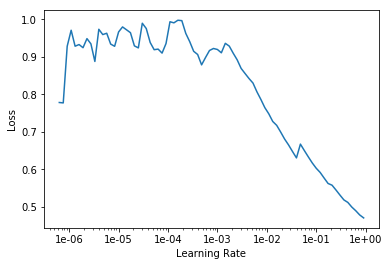

In [63]:
lr_find(learn)
learn.recorder.plot()

In [159]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[[3 5]
 [1 5]
 [3 1]
 [3 7]
 [3 5]]
[[-0.308682 -1.360281]
 [-0.308682 -1.388551]
 [ 2.933779  0.703397]
 [-0.30865  -0.886766]
 [-0.378267  0.261685]]
[3 3 5 2 0]


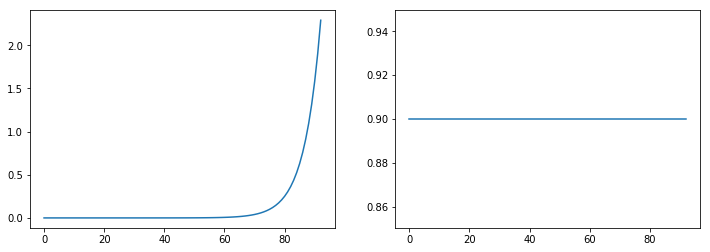

In [64]:
learn.recorder.plot_lr(show_moms=True)

In [80]:
testsetlow = len(df)-1000
randint= random.randrange(testsetlow, len(df))
#df.iloc[3]
print(learn.predict(df.iloc[randint]))
print(df.iloc[randint,4])

(8121680140, tensor(1), tensor([2.6240e-01, 7.3600e-01, 2.4721e-04, 1.5438e-04, 1.4786e-04, 1.0534e-03]))
8000081216


In [66]:
learn.predict(df.iloc[30])

(8121680140,
 tensor(1),
 tensor([2.9488e-05, 9.9988e-01, 1.3241e-06, 1.3889e-06, 4.8722e-05, 4.2089e-05]))

In [64]:
#learn.show_results(df)

In [10]:
cat_sz = [(c, len(df[c].cat.categories)+1) for c in cat_names];cat_sz
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz];emb_szs

AttributeError: Can only use .cat accessor with a 'category' dtype

# Crap